# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 8

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period, sma=70)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,symbol
241,2019-03-06,270.58,2019-03-13,274.50,3.91,1369.36,350,86152.09,
242,2019-03-22,273.66,2019-04-01,280.11,6.45,2263.34,351,88415.43,
243,2019-05-02,285.35,2019-05-03,288.14,2.79,960.77,344,89376.20,
244,2019-05-07,282.16,2019-06-05,277.29,-4.87,-1714.40,352,87661.80,
245,2019-07-19,292.64,2019-07-24,296.84,4.20,1400.21,333,89062.01,
246,2019-07-31,292.89,2019-08-29,288.12,-4.78,-1614.30,338,87447.72,
247,2019-09-20,295.09,2019-10-11,293.11,-1.98,-652.93,330,86794.79,
248,2019-12-03,306.23,2019-12-12,313.73,7.50,2369.63,316,89164.42,
249,2020-01-27,321.61,2020-02-04,327.14,5.53,1702.47,308,90866.89,
250,2020-02-21,331.53,2020-03-26,261.20,-70.33,-21380.47,304,69486.41,


In [8]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2020-06-02,79486.41,79486.41,79486.41,0,79486.41,-
2020-06-03,79486.41,79486.41,79486.41,0,79486.41,-
2020-06-04,79486.41,79486.41,79486.41,0,79486.41,-
2020-06-05,79486.41,79486.41,79486.41,0,79486.41,-
2020-06-08,79486.41,79486.41,79486.41,0,79486.41,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                   1993-11-11
end                                                     2020-06-08
beginning_balance                                            10000
ending_balance                                            79486.41
total_net_profit                                          69486.41
gross_profit                                             139906.27
gross_loss                                               -70419.85
profit_factor                                                 1.99
return_on_initial_capital                                   694.86
annual_return_rate                                            8.11
trading_period                           26 years 6 months 28 days
pct_time_in_market                                           31.94
total_num_trades                                               251
trades_per_year                                               9.44
num_winning_trades                                            

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-06-08 00:00:00 SELL 215 SPY @ 323.20


Plot Equity Curves: Strategy vs Benchmark

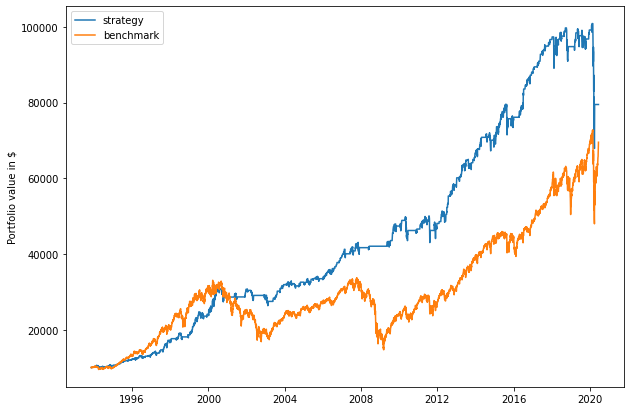

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

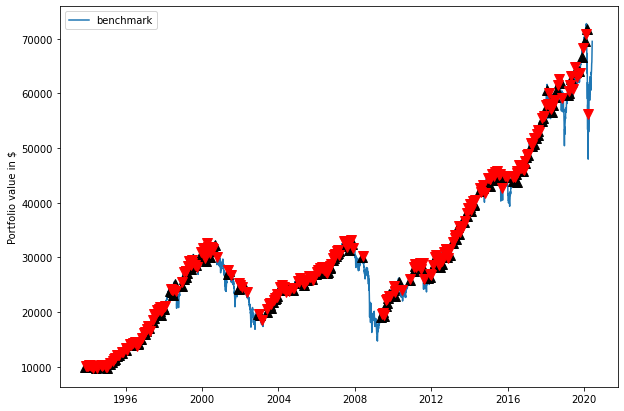

In [12]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,8.11,7.57
max_closed_out_drawdown,-32.72,-56.42
drawdown_annualized_return,-4.03,-7.45
drawdown_recovery,-0.13,-1.42
best_month,17.14,23.06
worst_month,-30.96,-31.38
sharpe_ratio,0.74,0.48
sortino_ratio,0.53,0.61
monthly_std,2.58,4.54


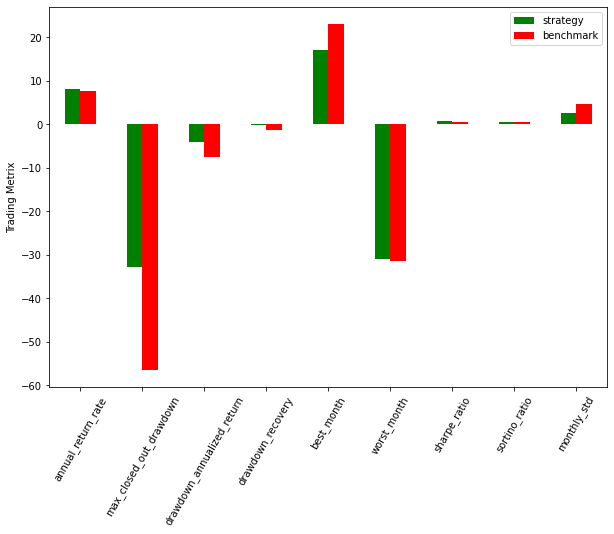

In [13]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df

In [14]:
returns = dbal['close']
returns.tail()

date
2020-06-02   79486.41
2020-06-03   79486.41
2020-06-04   79486.41
2020-06-05   79486.41
2020-06-08   79486.41
Name: close, dtype: float64

In [15]:
benchmark_returns = benchmark.dbal['close']
benchmark_returns.tail()

date
2020-06-02   66266.57
2020-06-03   67148.07
2020-06-04   66971.77
2020-06-05   68687.47
2020-06-08   69517.38
Name: close, dtype: float64

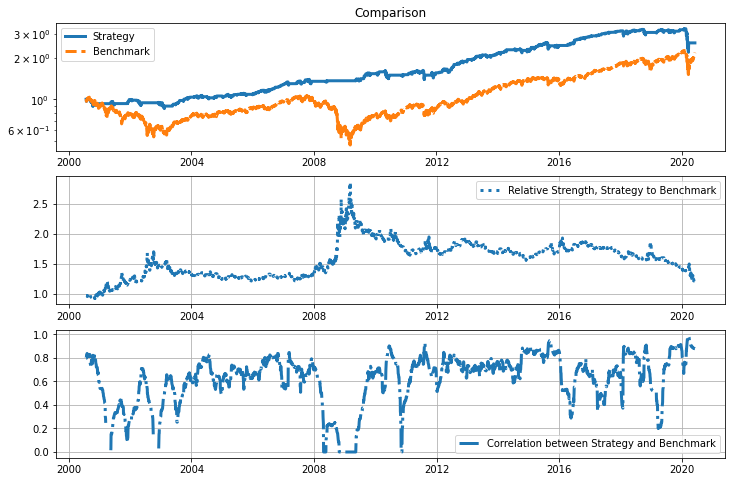

In [16]:
pf.prettier_graphs(returns, benchmark_returns, label1='Strategy', label2='Benchmark', points_to_plot=5000)